88Analisando uma base de dados pequena, de horas estudadas e scores obitidos em uma certa avaliação. 
&nbsp;

Objetivos principais:
1. Analise descitiva dos dados
2. Aplicação do modelo de ML de regressão linear do pacote sklearn
3. Analisar resultados do treinamento


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Carregando dados 

In [4]:
data = pd.read_csv('score.csv')

In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
 2   Ratio   25 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 728.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


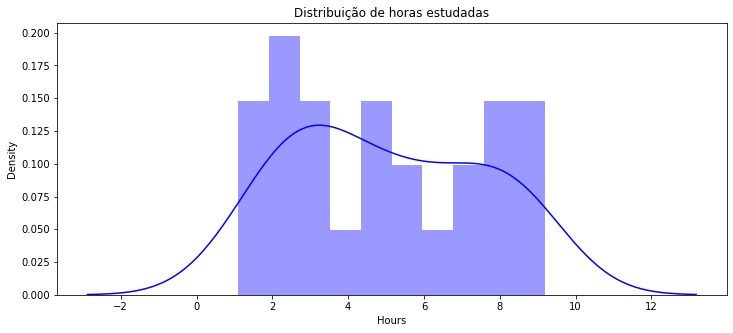

In [24]:
#Distribuição de horas estudadas
plt.figure(figsize=(12,5))
plt.title("Distribuição de horas estudadas")
ax = sns.distplot(data.Hours, bins = 10, color = 'b')

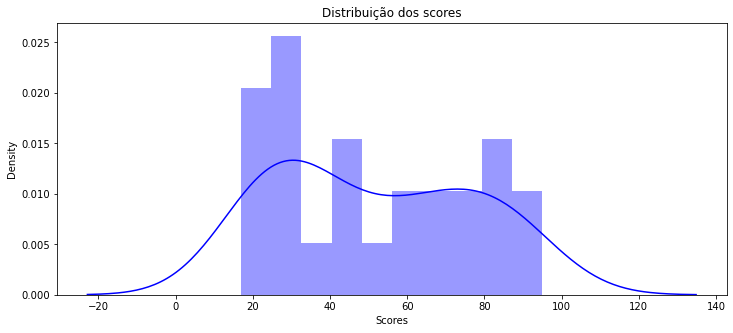

In [26]:
#Distribuição dos scores
plt.figure(figsize=(12,5))
plt.title("Distribuição dos scores")
ax = sns.distplot(data.Scores, bins = 10, color = 'b')

In [13]:
data['Ratio'] = data['Scores']/data['Hours']

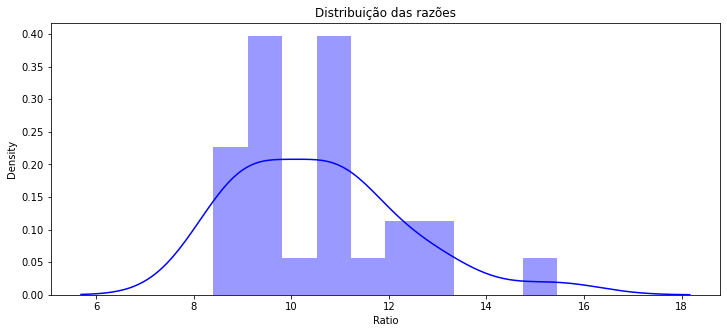

In [29]:
#Distribuição das razões
plt.figure(figsize=(12,5))
plt.title("Distribuição das razões")
ax = sns.distplot(data.Ratio, bins = 10, color = 'b')

<AxesSubplot:title={'center':'Relação score e tempo de estudo'}, xlabel='Scores', ylabel='Hours'>

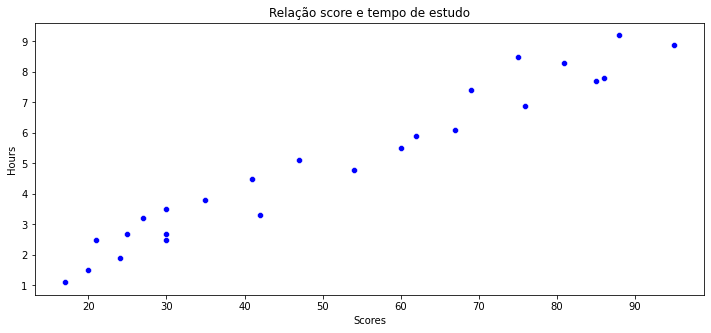

In [34]:
#Entendendo a relação entre score e tempo de estudo, através de um scatter plot
plt.figure(figsize=(12,5))
plt.title("Relação score e tempo de estudo")
sns.scatterplot(data['Scores'], data['Hours'],color = 'b')

In [35]:
#Verificando valores ausentes
data.isna().sum()

Hours     0
Scores    0
Ratio     0
dtype: int64

In [50]:
#Criando modelo de ML                               #Obs:como temos apenas 25 observações, será utilizado todo o dataframe para o treino
lr = LinearRegression()
x = np.array(data.Hours).reshape(-1, 1)
y = np.array(data.Scores).reshape(-1, 1)
lr.fit(x, y)

LinearRegression()

In [52]:
#Verificando o resultado
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.9529481969048356


In [53]:
#Verificando intercepto 
print('Intercepto:', lr.intercept_)

Intercepto: [2.48367341]


In [62]:
#Verificando o coeficiente
coeff_df = pd.DataFrame(lr.coef_,index = ['X1'] ,columns=['Coeficiente'])
coeff_df

,Coeficiente
X1,9.775803


In [63]:
#Analisando os erros
y_pred = lr.predict(x)
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))

MAE: 4.972805319866375
MSE: 28.882730509245466


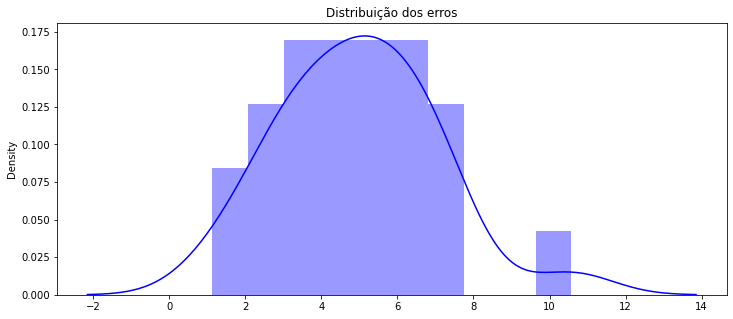

In [65]:
#Distribuição dos erros
erro = abs(y - y_pred)
plt.figure(figsize=(12,5))
plt.title("Distribuição dos erros")
ax = sns.distplot(erro, bins = 10, color = 'b')


In [68]:
print(f'Desvio padrão : {erro.std()}')
print(f'Média : {erro.mean()}')

Desvio padrão : 2.0381211347596944
Média : 4.972805319866375
